In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Importando o dataset e verificando os dados

In [2]:
dataset = keras.datasets.fashion_mnist
dataset.load_data() # A função load_data() devolve duas tuplas no python, ou seja, duas listas que não podem ser alteradas

((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [3]:
print(imagens_treino.shape)
print(imagens_teste.shape)

print('Labels de treino: ', len(identificacoes_treino))
print('Labels de teste:', len(identificacoes_teste))

(60000, 28, 28)
(10000, 28, 28)
Labels de treino:  60000
Labels de teste: 10000


Text(0.5, 1.0, '9')

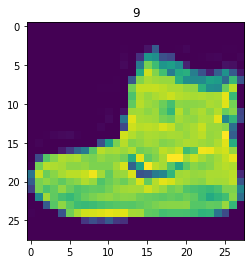

In [4]:
# Exibindo as imagens do nosso dataset
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [5]:
# Observamos que nas identificações obtivemos um número, explorar para saber quantas classidicações temos no dataset
print('identificacoes maxima: ', identificacoes_treino.min())
print('identificacoes minima: ', identificacoes_treino.max())

identificacoes maxima:  0
identificacoes minima:  9


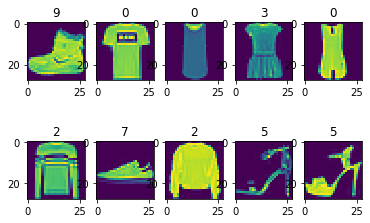

In [6]:
# Temos classificacoes de 0 a 9, logo temos 10 tipos de roupas diferentes
total_de_classificacoes = 10

for imagem in range(total_de_classificacoes): # Iteramos sobre cada indice de classificacao para obrter nossos gráficos
    plt.subplot(2, 5, imagem+1) # criamos um sub gráfico com 2 linhas e 5 colunas
    plt.imshow(imagens_treino[imagem])
    plt.title(identificacoes_treino[imagem])

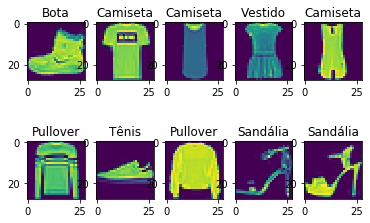

In [7]:
# Não temos uma legemda específica do que é exatamente cada elemento, mas podemos cuonsultar na documentação do fashion_mnist
# https://github.com/zalandoresearch/fashion-mnist
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                            'Vestido', 'Casaco', 'Sandália', 'Camisa',
                            'Tênis', 'Bolsa', 'Bota']

for imagem in range(total_de_classificacoes):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    
    # Com a númeração acessamos o indice de nomes_de classoficacoes e substituimos no gráfico, 
    # agora sabemos o que é cada imagem
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]]) 

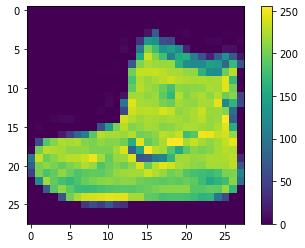

In [8]:
#Verificando a escala de cor
plt.imshow(imagens_treino[0])
plt.colorbar()

# Começando a montar nosso modelo

In [9]:
# Criando a entrada, processamento e saida
# A fução flatten faz o achatamento da nossa entrada
# A camada densa é totalmente conectada com a entrada
# O dropout deixa uma certa quantidade de neurônios passada pelo programador inativos

# Para capturar nossa variação de cor dividimos e convertemos para float para pegar valores entre 0 e 1(normalização)
imagens_treino = imagens_treino/float(255)  

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),    
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) 
])

In [38]:
# Ajustando os hiperparâmetretos do nosso otimizador
adam = keras.optimizers.Adam(lr=0.0001) # lr = Learning rate

# Vamos setar um callback para monitorar o valor de perda, ou seja, quando ele parar de cair também vamos parar de treinar
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
            keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', monitor='val_loss', save_best_only=True)]

# Compilando e treinando o nosso modelo
modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size=4800, 
                       epochs=5, 
                       validation_split=0.2, 
                       callbacks=callbacks)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1s 22us/sample - loss: 2.3051 - accuracy: 0.0999 - val_loss: 2.3051 - val_accuracy: 0.1003
Epoch 2/5
48000/48000 [==============================] - 1s 14us/sample - loss: 2.3051 - accuracy: 0.0999 - val_loss: 2.3051 - val_accuracy: 0.1003
Epoch 3/5
48000/48000 [==============================] - 1s 14us/sample - loss: 2.3050 - accuracy: 0.0999 - val_loss: 2.3050 - val_accuracy: 0.1003
Epoch 4/5
48000/48000 [==============================] - 1s 14us/sample - loss: 2.3050 - accuracy: 0.0999 - val_loss: 2.3050 - val_accuracy: 0.1003
Epoch 5/5
48000/48000 [==============================] - 1s 14us/sample - loss: 2.3050 - accuracy: 0.0999 - val_loss: 2.3049 - val_accuracy: 0.1003


# Sumário do modelo

In [11]:
# Resumo do nosso modelo
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Pesos das camadas

In [12]:
# Verifcando os pesos da nossa rede
# Como resultado dos nosso het_wights retorna 2 posições 0 com os pesos e 1 com os viéses
pesos_camada_dense = modelo.layers[1].get_weights()[0]
vieses_camada_dense = modelo.layers[1].get_weights()[1]
pesos_camada_dense

array([[ 0.05208882,  0.0522328 ,  0.02984453, ..., -0.0119002 ,
        -0.03769113,  0.01600658],
       [ 0.05047015, -0.0470638 , -0.04556233, ...,  0.03282436,
        -0.06956697, -0.07159262],
       [-0.04151999,  0.04337453,  0.07439558, ...,  0.01914477,
         0.01934917, -0.08372623],
       ...,
       [ 0.01659702,  0.03088449, -0.05890971, ...,  0.03527637,
        -0.06959782,  0.01862269],
       [-0.04439254,  0.06240408, -0.00057587, ...,  0.07999466,
        -0.06167754,  0.05701379],
       [ 0.01992301,  0.0927163 ,  0.04059226, ...,  0.03890046,
        -0.03947221,  0.04107554]], dtype=float32)

# Escolhendo nossos pesos manualmente

In [13]:
# Vamos criar uma cópia da nossa matrix de pesos e substituir os valores por 0, para tal precisamos daber o seu formato
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))
pesos_camada_dense_zerados

# Atribuindo os pesos zerados e mantendo nossos viéses originais
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])
modelo.layers[1].get_weights()[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Experimento: treino e teste com pesos zerados

In [14]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 121us/sample - loss: 0.5401 - accuracy: 0.8081 - val_loss: 0.4505 - val_accuracy: 0.8367
Epoch 2/5
48000/48000 [==============================] - 5s 98us/sample - loss: 0.4134 - accuracy: 0.8511 - val_loss: 0.3847 - val_accuracy: 0.8583
Epoch 3/5
48000/48000 [==============================] - 4s 82us/sample - loss: 0.3761 - accuracy: 0.8628 - val_loss: 0.3505 - val_accuracy: 0.8737
Epoch 4/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.3550 - accuracy: 0.8690 - val_loss: 0.3467 - val_accuracy: 0.8749
Epoch 5/5
48000/48000 [==============================] - 5s 101us/sample - loss: 0.3374 - accuracy: 0.8752 - val_loss: 0.3621 - val_accuracy: 0.8654


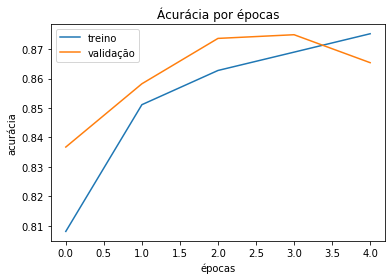

In [15]:
# Verificando gráficamente nossa acurácia
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

plt.title('Ácurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])
plt.show()

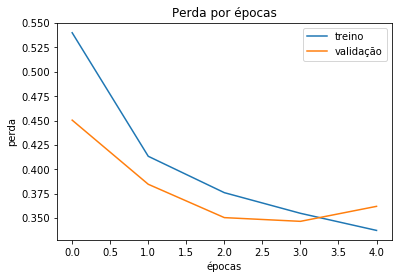

In [16]:
# Verificando gráficamente nossa perda
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])
plt.show()

# Conclusões desse experimento

O que fizemos NÃO É RECOMENDADO, quando zeramos nossos pesos não conseguimos diferenviar qual é mais ou menos importante, logo, nossa rede não irá performar bem. Esse processo de zerar os pesos é chamado de manter a simetria da rede e ela deve ser quebrada para obtermos resultados mais interessantes.

Mas se não podemos iniciar uma rede com zeros, como inicia-lá? Veremos abaixo.

In [17]:
# Vamos trabalhar com pesos aleatórios

# Atribuindo os pesos aleatórios e mantendo nossos viéses originais
pesos_camada_dense_aleatorios = np.random.rand(784, 256)

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])
modelo.layers[1].get_weights()[0]

array([[0.07068509, 0.8795676 , 0.7884594 , ..., 0.95261496, 0.812725  ,
        0.4272244 ],
       [0.12917942, 0.8584061 , 0.9828539 , ..., 0.520109  , 0.83615947,
        0.26724124],
       [0.0076083 , 0.88727885, 0.5320177 , ..., 0.41971248, 0.03608968,
        0.7251821 ],
       ...,
       [0.5969256 , 0.29323807, 0.24619965, ..., 0.66489583, 0.8793694 ,
        0.22796898],
       [0.59767145, 0.8080513 , 0.09268548, ..., 0.5045589 , 0.9359454 ,
        0.8259061 ],
       [0.9649955 , 0.803857  , 0.25090578, ..., 0.1309991 , 0.21663499,
        0.5012559 ]], dtype=float32)

In [18]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 111us/sample - loss: 100.0020 - accuracy: 0.4166 - val_loss: 18.7106 - val_accuracy: 0.6677
Epoch 2/5
48000/48000 [==============================] - 4s 77us/sample - loss: 26.2076 - accuracy: 0.6345 - val_loss: 9.1150 - val_accuracy: 0.7511
Epoch 3/5
48000/48000 [==============================] - 5s 103us/sample - loss: 11.7346 - accuracy: 0.6903 - val_loss: 5.4801 - val_accuracy: 0.7475
Epoch 4/5
48000/48000 [==============================] - 4s 83us/sample - loss: 5.7198 - accuracy: 0.7225 - val_loss: 2.6966 - val_accuracy: 0.8098
Epoch 5/5
48000/48000 [==============================] - 6s 126us/sample - loss: 2.9228 - accuracy: 0.7527 - val_loss: 1.8196 - val_accuracy: 0.8004


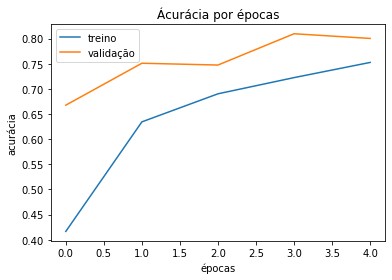

In [19]:
# Verificando gráficamente nossa acurácia
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

plt.title('Ácurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

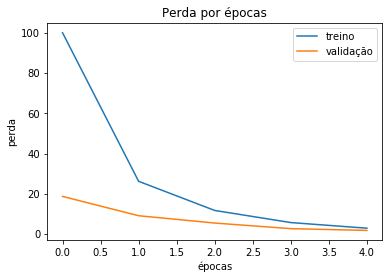

In [20]:
# Verificando gráficamente nossa perda
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

# Conclusão da experimentacão com valores aleatórios

Embra tenha apresentado resultado interessantes(ao menos no memnto em que estou escrevendo esse comentário), usar valores aleatórios também não é uma boa solução pelo fato dele poder usar valores muito pequenos, que não vão nos entregar um resultado interessante, quanto muito grandes onde nossas unidades vão ter comportamentos alucicrazys.

Vamos tentar entender como o keras resolve esse problema para nós por debaixo dos panos

In [21]:
# Pegando as configurações do modelo
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.2,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 10,
    'a

Notamos que na inicialização do kernel "kernel_initializer" ele chama a class GlototUniform(também conhecida como algoritmo de Chavier, que faz uma distribuição dos nossos valores, fazendo assim com que eles não sejam sem muito baixos ou zerados nem muito altos.

In [22]:
#vieses_camada_dense_zerados = modelo.get_weights()[1] = np.zeros((256, ))
#modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense_zerados])

In [23]:
#modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

# Salvando e avaliando nosso modelo

In [24]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

# Avaliando a ácuracia

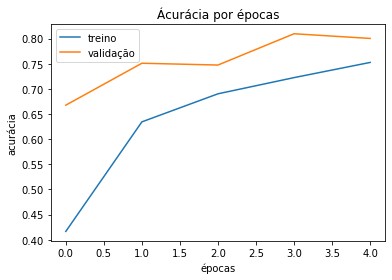

In [25]:
# Verificando gráficamente nossa acurácia
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

plt.title('Ácurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

# Avaliando a perda

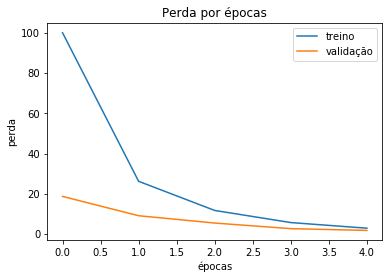

In [26]:
# Verificando gráficamente nossa perda
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

# Realizando predições

In [27]:
# Predição
teste = modelo.predict(imagens_teste)
print('Resultado teste: ', np.argmax(teste[1]))
print('Número da imagem de teste: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado teste modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('Número da imagem de teste: ', identificacoes_teste[1])

Resultado teste:  2
Número da imagem de teste:  2
Resultado teste modelo salvo:  2
Número da imagem de teste:  2


In [28]:
#Avaliação do nosso modelo
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acurácia do teste: ', acuracia_teste)

10000/10000 [==============================] - 1s 60us/sample - loss: 502.3764 - accuracy: 0.7801
Perda do teste:  502.37636759033205
Acurácia do teste:  0.7801
